## Logistic Regression

This notebook will demonstrate an application of Logistic Regression on the [Breast Cancer](dataset/data.csv) dataset. 

In [1]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import time

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report #for nice result formatting

In [2]:
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()
# Split into features and labels
X = data.data
y = data.target
print(data.DESCR) 


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# Load the Bunch object (example with breast cancer dataset)
data_bunch = load_breast_cancer()
# Convert to DataFrame
df = pd.DataFrame(data_bunch.data, columns=data_bunch.feature_names)
# Optionally, if there are target labels
df['diagnosis'] = data_bunch.target  
# Check the data type of 'data'
print(type(data))


<class 'sklearn.utils._bunch.Bunch'>


In [4]:
import plotly.express as px

# Create a histogram from the DataFrame
histogram = px.histogram(data_frame=df, 
                         x='diagnosis',  # Choose a column for the x-axis
                         nbins=10,  # Number of bins (optional)
                         color='diagnosis',  # Color by diagnosis (optional)
                         title='Histogram of Diagnosis')  # Plot title

# Display the histogram
histogram.show()


In [8]:
# Map 0 to 'M' and 1 to 'B'
df['diagnosis_label'] = df['diagnosis'].map({0: 'M', 1: 'B'})

# Create a histogram with custom labels and no gap
histogram = px.histogram(data_frame=df, 
                         x='diagnosis_label',  # Use the mapped column
                         color='diagnosis_label',  # For color-coding
                         color_discrete_sequence=['#05445E', '#75E6DA'],  # Custom colors
                         title='Histogram of Diagnosis')

# Display the histogram
histogram.show()


In [ ]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [12]:
print(df.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [13]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} unique values: {df[col].unique()}")

diagnosis_label unique values: ['M' 'B']


In [15]:
df_numeric = df.select_dtypes(include=[float, int])

In [17]:
corr = df_numeric.corr()  # Compute correlation for numeric-only DataFrame


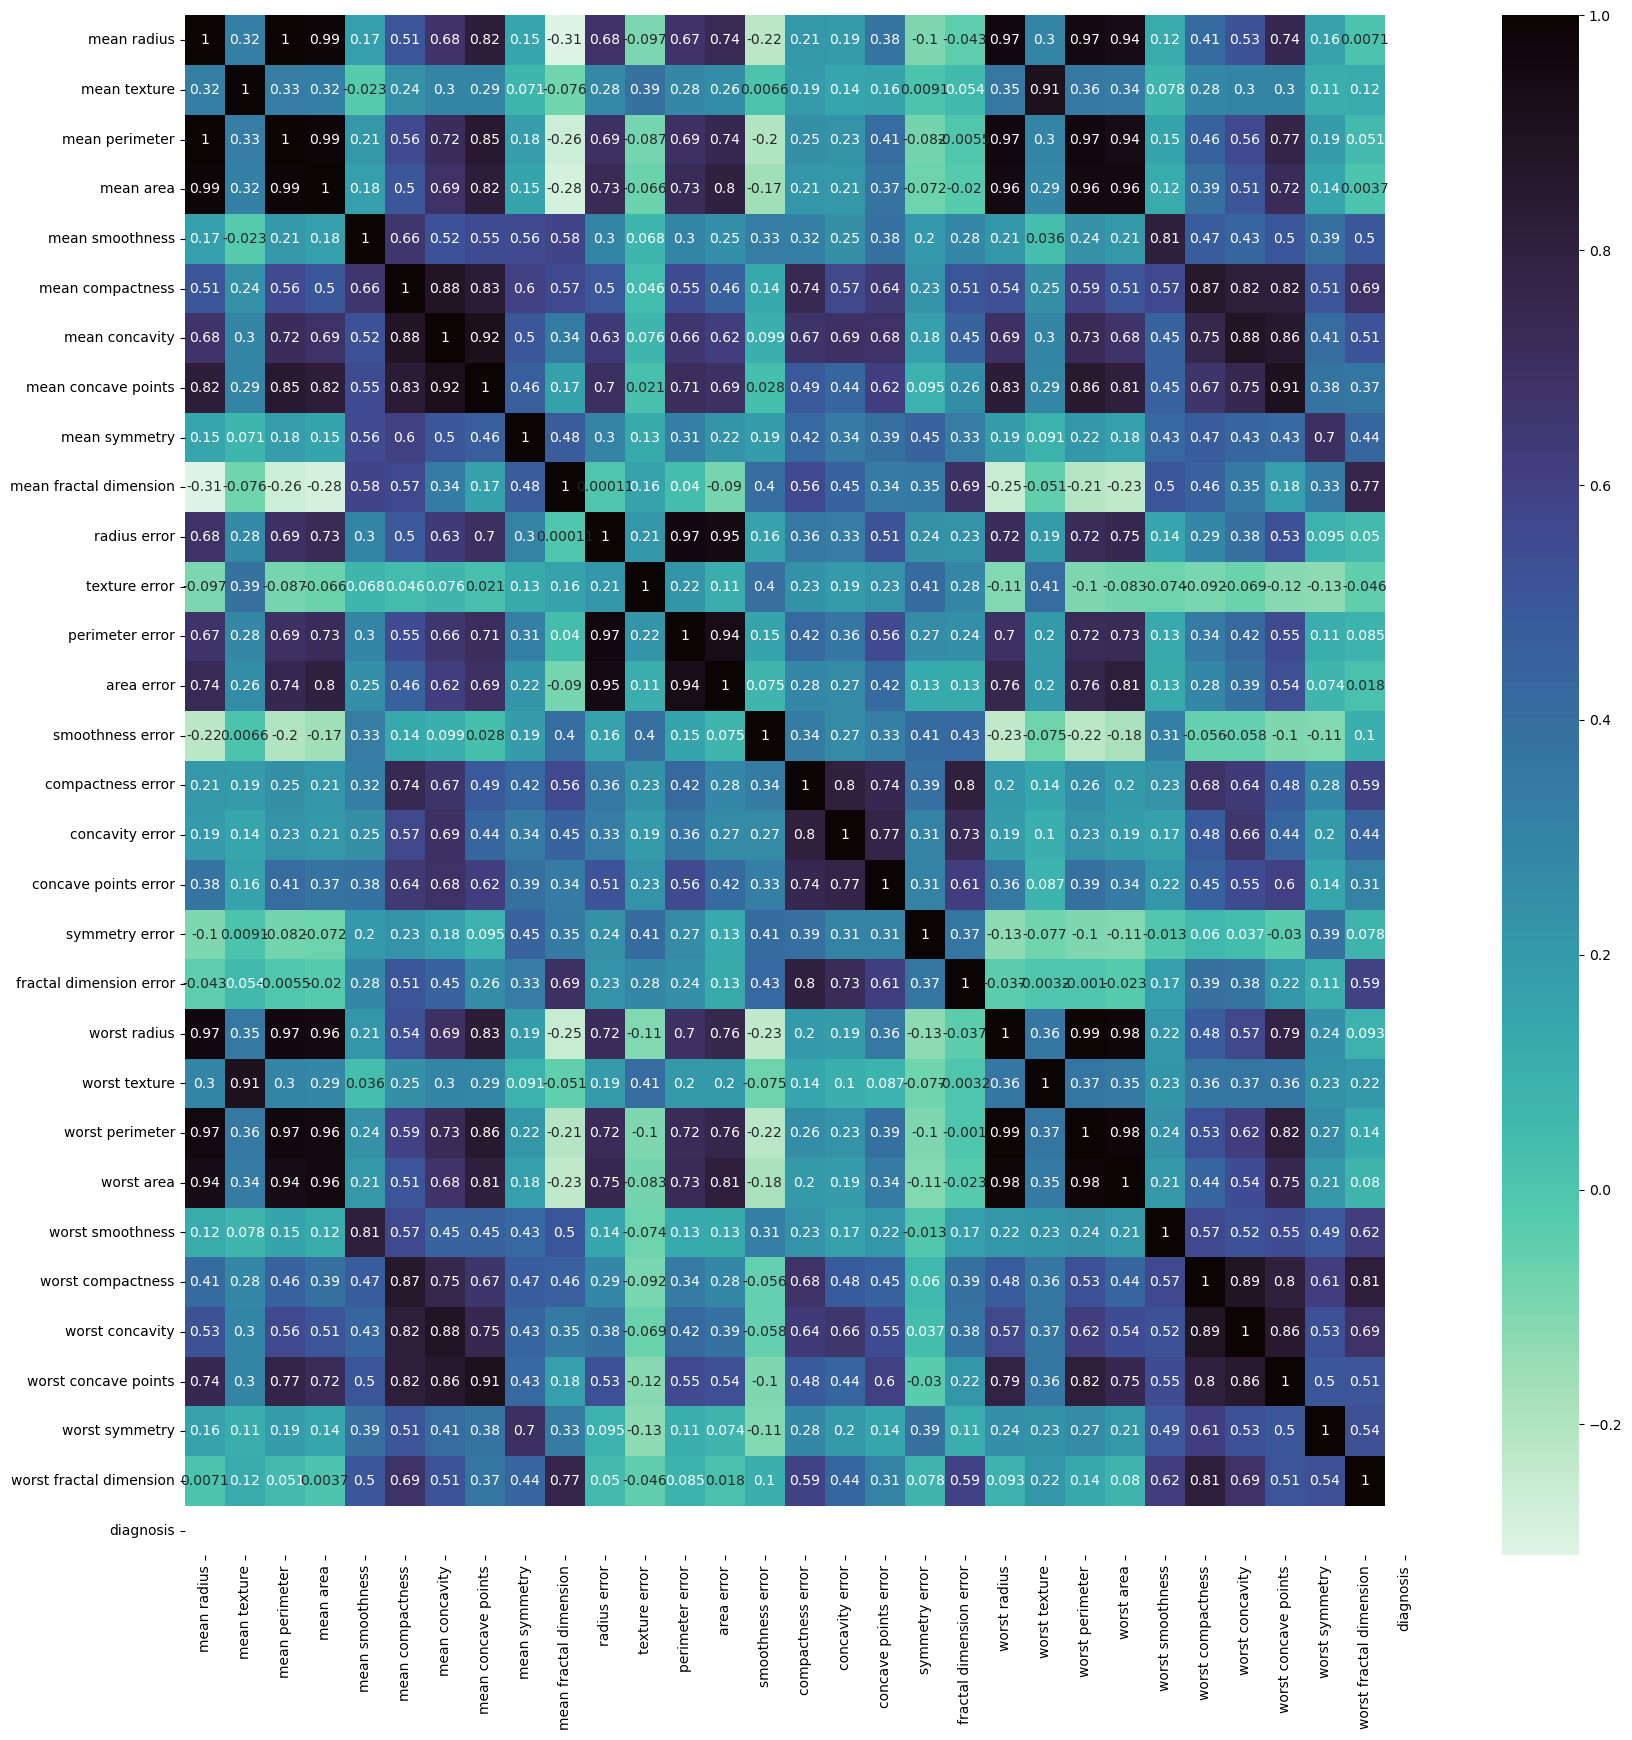

In [23]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0
corr = df_numeric.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

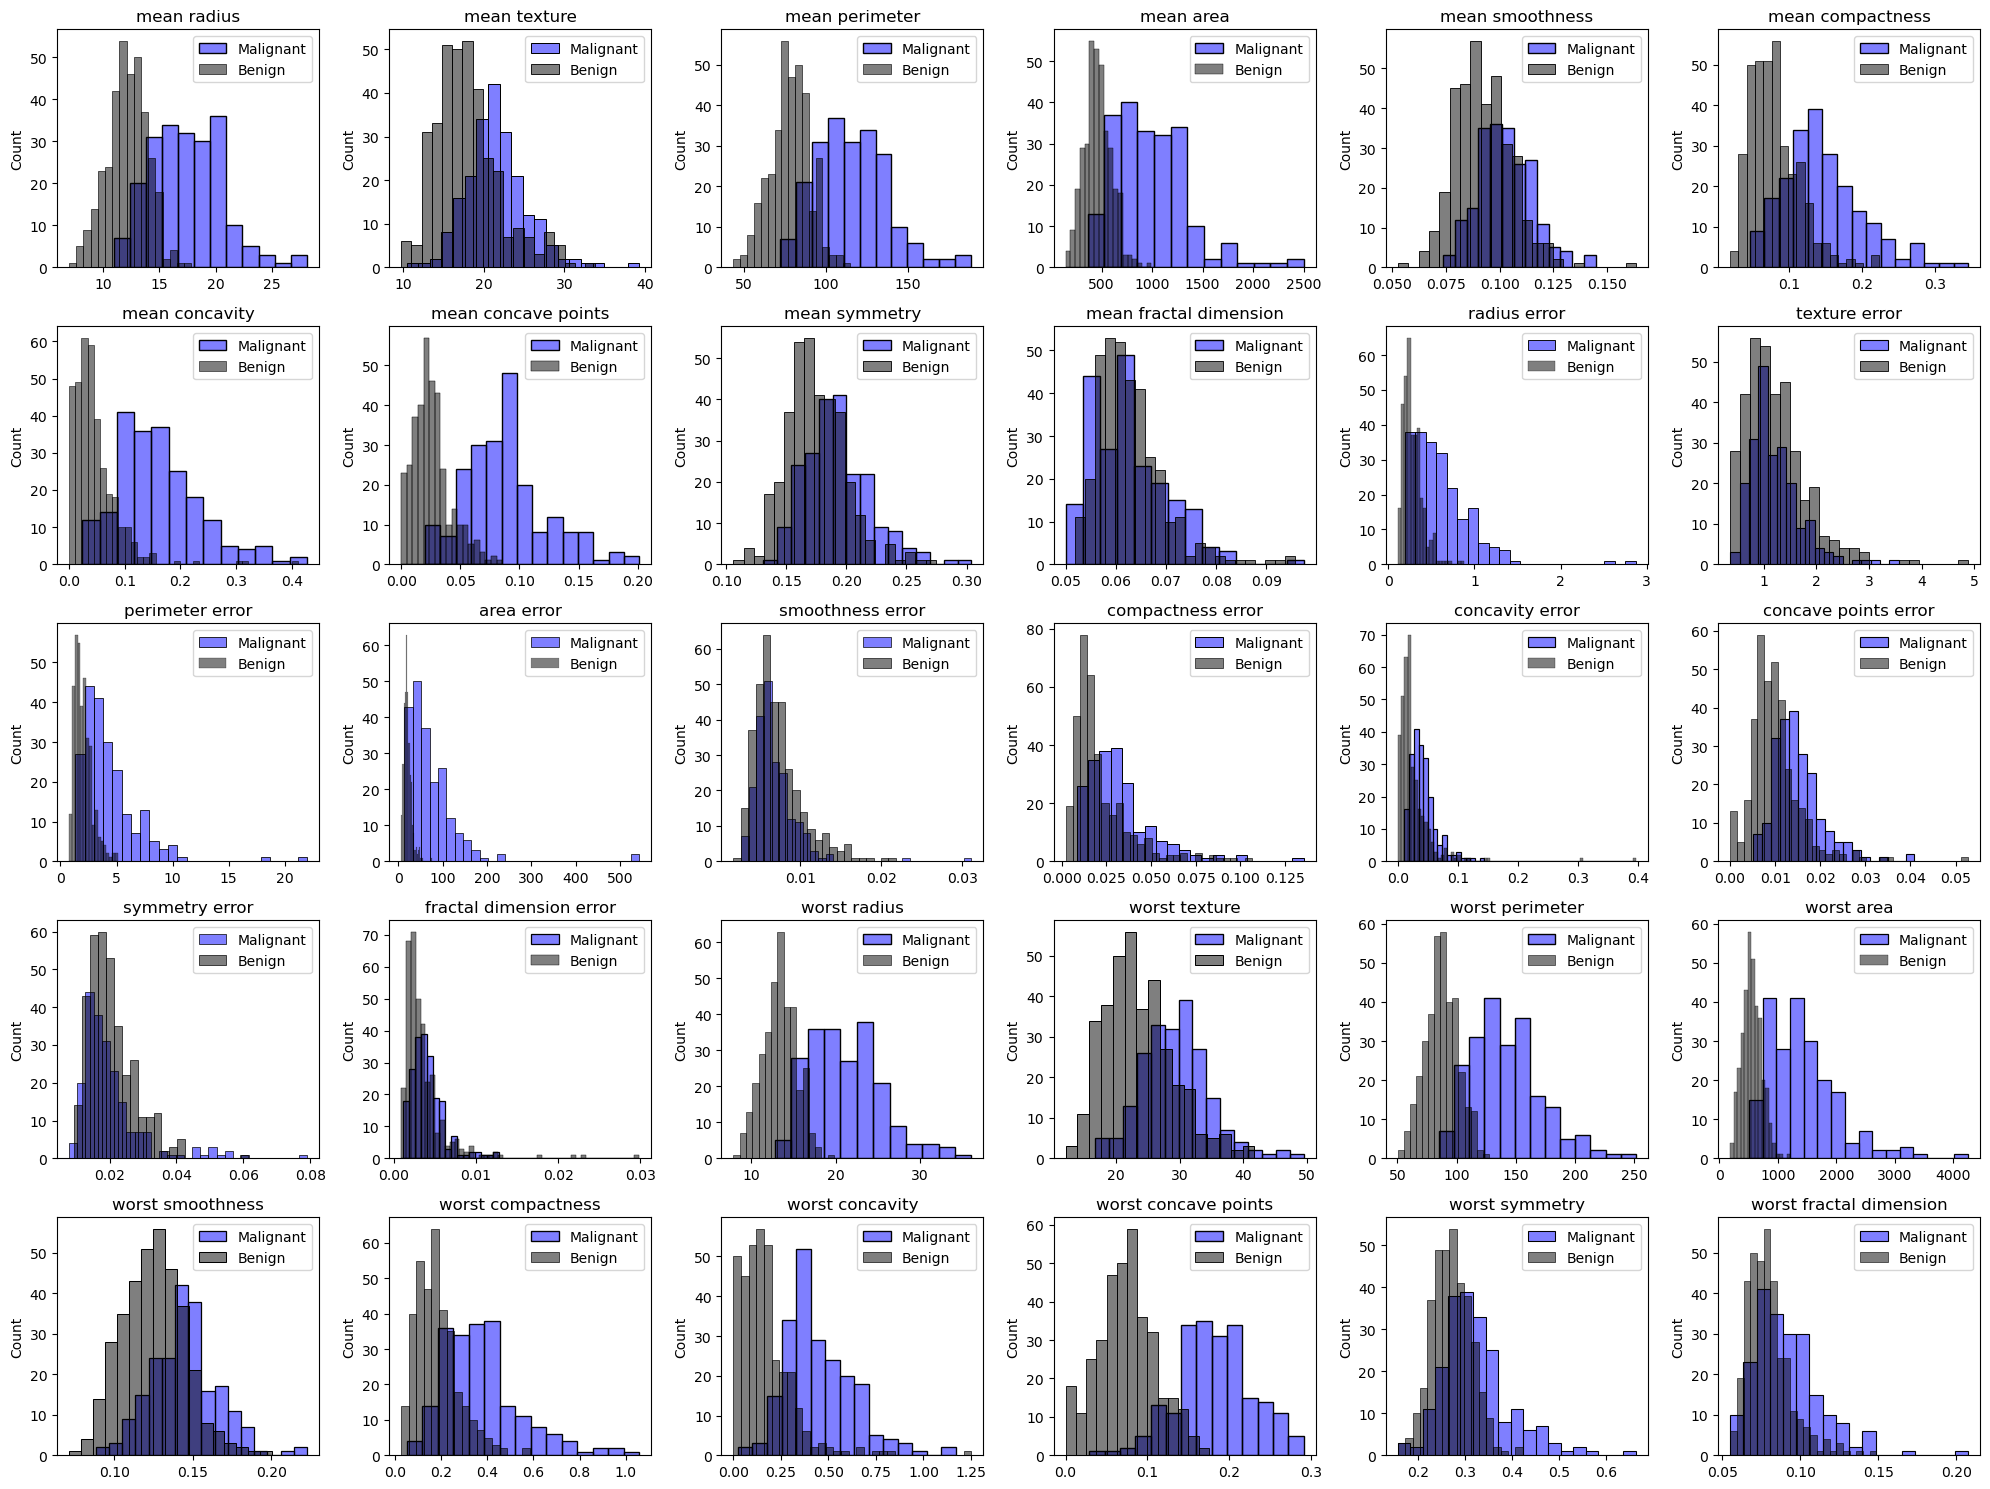

In [24]:
fig, axs = plt.subplots(5, 6, figsize=(20, 15))
axs = axs.flatten()

for i in range(X.shape[1]):
    sns.histplot(data=X[y==0, i], ax=axs[i], color="blue", alpha=0.5)
    sns.histplot(data=X[y==1, i], ax=axs[i], color="black", alpha=0.5)
    axs[i].set_title(data.feature_names[i])
    axs[i].legend(["Malignant", "Benign"])

fig.tight_layout()
plt.show()

### Split into Train and Test data

To apply logistic regression, the data must be split into "training" and "test" data.

In [25]:
#Split data into test and train
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

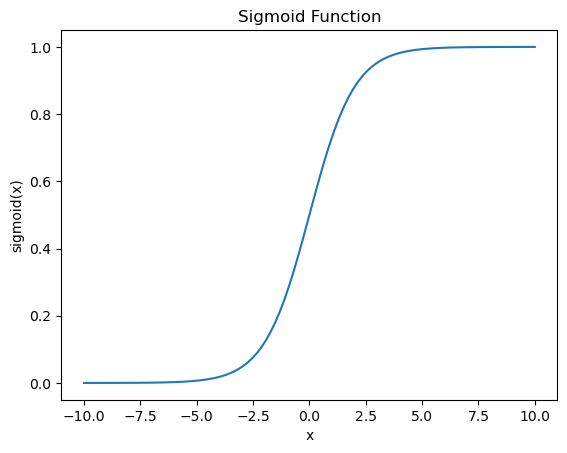

In [26]:
def sigmoid(x):
    """
    Compute sigmoid of input array.

    Parameters:
    -----------
    z : array-like, shape (n_samples,)
        Input array.

    Returns:
    --------
    sigmoid : array-like, shape (n_samples,)
        Sigmoid of input array.

    """
    return 1 / (1 + np.exp(-x))

#Visualize the sigmoid function 
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()

In [27]:
scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

X_train = scaler.transform(X_train) #transform training data
X_test = scaler.transform(X_test) #transform validation data

In [28]:
# Import LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression
# train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# make predictions using testing data
predictions = model.predict(X_test)

## Performance Analysis
The next step is to conduct a performance analysis of the model. We do this by examining the confusion matrix and the Receiver Operating Characteristic (ROC) curve..

In [30]:
# calculate accuracy and confusion matrix on test set
accuracy = accuracy_score(y_test,predictions)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.97


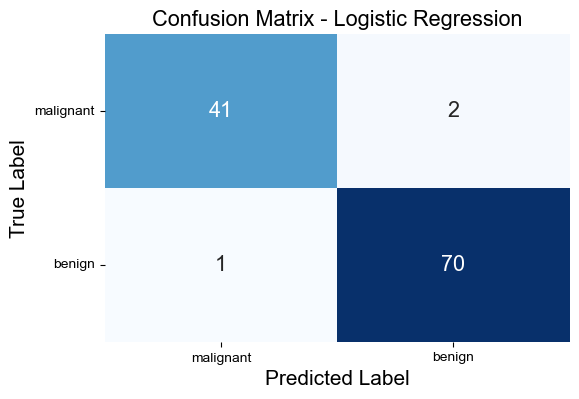

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Confusion matrix from the logistic regression results
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

# Convert to DataFrame
matrix_df = pd.DataFrame(confusion_matrix)

# Plot confusion matrix with a different color map
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df,
            annot=True,  # Show the numbers on the heatmap
            fmt="g",
            ax=ax,
            cmap="Blues",  # Change the color map here
            cbar=False)  # Hide the color bar if desired
ax.set_title("Confusion Matrix - Logistic Regression")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["malignant", "benign"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["malignant", "benign"], rotation=0)
plt.show()

In [33]:
from sklearn.metrics import classification_report
#Checking performance our model with classification report.
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



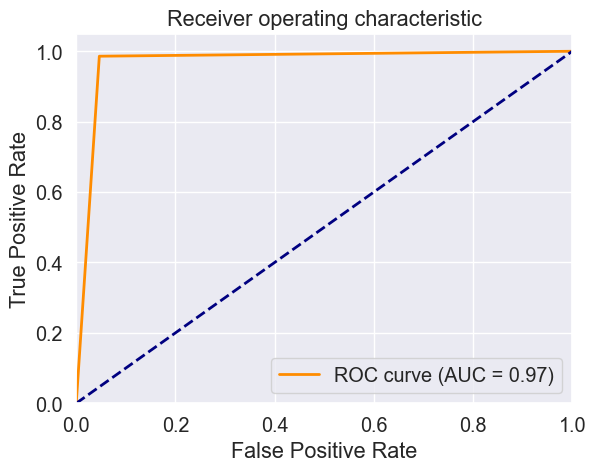

In [34]:
# calculate ROC curve and AUC on test set
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,predictions)
roc_auc = auc(fpr, tpr)
# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()